# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
X.shape, y.shape

((70000, 784), (70000,))

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [65]:
# your code here
X[35], y[35]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

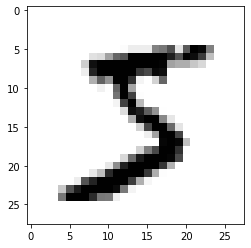

In [77]:
# your code here
import numpy as np
import pandas as pd

x = X[0].reshape(28,28)
plt.imshow(x, cmap = plt.cm.binary, interpolation="nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

Text(0.5, 1.0, '5')

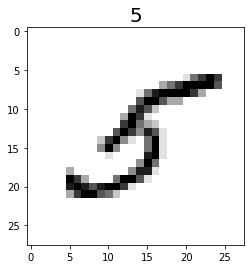

In [48]:
# your code here

x = X[35].reshape(28,28)
plt.imshow(x, cmap = plt.cm.binary, interpolation="nearest")
plt.title(y[35], size=20)


#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [127]:
# your code here
X_train = X[:6000,:]
X_test  = X[-1000:,:]

y_train = y[:6000]
y_test  = y[6000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [128]:
# your code here
y_train_5 = np.where(y_train=='5', 1, 0)
y_test_5 = np.where(y_train=='5', 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [129]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_scor

In [130]:
#X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size = 0.2, random_state=0)

In [170]:
clf = LogisticRegression()
clf.fit(X_train, y_train_5)
y5_pred = clf.predict(X_train)

c:\program files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Does the classifier predict correctly the 35th digit we picked before?

In [176]:
# your code here
y5_pred[35], y_train_5[35]

(1, 1)

Text(0.5, 1.0, '5')

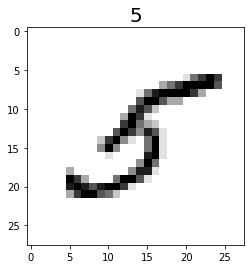

In [172]:
x = X[35].reshape(28,28)
plt.imshow(x, cmap = plt.cm.binary, interpolation="nearest")
plt.title(y[35], size=20)

In [ ]:
# your comments here

#### The 36000th value is a 9. Check if it was correctly predicted.

Text(0.5, 1.0, '9')

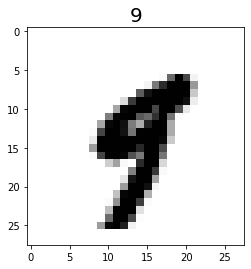

In [138]:
# your code here
X[36000]

x = X[36000].reshape(28,28)
plt.imshow(x, cmap = plt.cm.binary, interpolation="nearest")
plt.title(y[36000], size=20)

In [ ]:
# your comments here

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [136]:
# Libraries
from sklearn.base import BaseEstimator

In [182]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [181]:
# your code here
from sklearn.model_selection import cross_val_score
#cross_val_score(never_5_clf, X_train, y_test_5, cv=3, scoring="accuracy")

never_5_y_pred = never_5_clf.predict(y_test_5)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [191]:
# your code here
from sklearn import metrics
from sklearn.metrics import f1_score

cnf_matrix = metrics.confusion_matrix(never_5_y_pred, y5_pred)
print(cnf_matrix)


[[5485  515]
 [   0    0]]


In [195]:
print("f1_score:", f1_score(y_test_5, y5_pred))
print("Accuracy:",metrics.accuracy_score(y_test_5, y5_pred))
print("Precision:",metrics.precision_score(y_test_5, y5_pred))
print("Recall:",metrics.recall_score(y_test_5, y5_pred))

f1_score: 0.9990281827016522
Accuracy: 0.9998333333333334
Precision: 0.9980582524271845
Recall: 1.0


In [196]:
print("f1_score:", f1_score(y_test_5, never_5_y_pred))
print("Accuracy:",metrics.accuracy_score(y_test_5, never_5_y_pred))
print("Precision:",metrics.precision_score(y_test_5, never_5_y_pred))
print("Recall:",metrics.recall_score(y_test_5, never_5_y_pred))

f1_score: 0.0
Accuracy: 0.9143333333333333
Precision: 0.0
Recall: 0.0


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [ ]:
# your code here

#### Now find the roc_auc_score for each. 

In [ ]:
# your code here

#### What does this metric tell you? Which classifier works better with this metric in mind?

ModuleNotFoundError: No module named 'arcgis'